In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import t
from scipy import stats
%matplotlib inline
import statistics
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [4]:
1.Загрузить файл hr.csv.

In [45]:
df_= pd.read_csv('hr.csv')
df = df_.rename(columns = {'sales':'department'})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,
мин/макс,сред.отклонение).

In [3]:
sl_mean = statistics.mean(df['satisfaction_level'])
sl_median = statistics.median(df['satisfaction_level'])
sl_mode = statistics.mode(df['satisfaction_level'])
sl_min = min(df['satisfaction_level'])
sl_max = max(df['satisfaction_level'])
sl_pstdev = statistics.pstdev(df['satisfaction_level'])
le_mean = statistics.mean(df['last_evaluation'])
le_median = statistics.median(df['last_evaluation'])
le_mode = statistics.mode(df['last_evaluation'])
le_min = min(df['last_evaluation'])
le_max = max(df['last_evaluation'])
le_pstdev = statistics.pstdev(df['last_evaluation'])
np_mean = statistics.mean(df['number_project'])
np_median = statistics.median(df['number_project'])
np_mode = statistics.mode(df['number_project'])
np_min = min(df['number_project'])
np_max = max(df['number_project'])
np_pstdev = statistics.pstdev(df['number_project'])
amh_mean = statistics.mean(df['average_montly_hours'])
amh_median = statistics.median(df['average_montly_hours'])
average_montly_counts = {}
average_montly = df['average_montly_hours']
for el in average_montly:
    if el in average_montly_counts:
        average_montly_counts[el] += 1
    else:
        average_montly_counts[el] = 1
maxp = 0
amh_mode = None
for k, v in average_montly_counts.items():
    if maxp < v:
        maxp = v
        amh_mode = k
amh_min = min(df['average_montly_hours'])
amh_max = max(df['average_montly_hours'])
amh_pstdev = statistics.pstdev(df['average_montly_hours'])
tsc_mean = statistics.mean(df['time_spend_company'])
tsc_median = statistics.median(df['time_spend_company'])
tsc_mode = statistics.mode(df['time_spend_company'])
tsc_min = min(df['time_spend_company'])
tsc_max = max(df['time_spend_company'])
tsc_pstdev = statistics.pstdev(df['time_spend_company'])
print(
    'Для переменной satisfaction_level среднее', round(sl_mean, 2), ',',
    'медиана', sl_median, ',', 'мода', sl_mode, ',', 'мин', sl_min, ',',
    'макс', sl_max, ',', 'сред. отклонение', round(sl_pstdev, 2),'.', 
    'Для переменной last_evaluation среднее', round(le_mean, 2), ',',
    'медиана', le_median, ',', 'мода', le_mode, ',', 'мин', le_min, ',',
    'макс', le_max, ',', 'сред. отклонение', round(le_pstdev, 2),'.',
    'Для переменной number_project среднее', round(np_mean, 2), ',',
    'медиана', np_median, ',', 'мода', np_mode, ',', 'мин', np_min, ',',
    'макс', np_max, ',', 'сред. отклонение', round(np_pstdev, 2),'.',
    'Для переменной average_montly_hours среднее', round(amh_mean, 2), ',',
    'медиана', amh_median, ',', 'мода', amh_mode, ',', 'мин', amh_min, ',',
    'макс', amh_max, ',', 'сред. отклонение', round(amh_pstdev, 2),'.',
    'Для переменной time_spend_company среднее', round(tsc_mean, 2), ',',
    'медиана', tsc_median, ',', 'мода', tsc_mode, ',', 'мин', tsc_min, ',',
    'макс', tsc_max, ',', 'сред. отклонение', round(tsc_pstdev, 2),'.'
)

Для переменной satisfaction_level среднее 0.61 , медиана 0.64 , мода 0.1 , мин 0.09 , макс 1.0 , сред. отклонение 0.25 . Для переменной last_evaluation среднее 0.72 , медиана 0.72 , мода 0.55 , мин 0.36 , макс 1.0 , сред. отклонение 0.17 . Для переменной number_project среднее 3.8 , медиана 4 , мода 4 , мин 2 , макс 7 , сред. отклонение 1.23 . Для переменной average_montly_hours среднее 201.05 , медиана 200 , мода 135 , мин 96 , макс 310 , сред. отклонение 49.94 . Для переменной time_spend_company среднее 3.5 , медиана 3 , мода 3 , мин 2 , макс 10 , сред. отклонение 1.46 .


In [4]:
wa_mean = statistics.mean(df['Work_accident'])
wa_median = statistics.median(df['Work_accident'])
wa_mode = statistics.mode(df['Work_accident'])
wa_min = min(df['Work_accident'])
wa_max = max(df['Work_accident'])
wa_pstdev = statistics.pstdev(df['Work_accident'])
left_mean = statistics.mean(df['left'])
left_median = statistics.median(df['left'])
left_mode = statistics.mode(df['left'])
left_min = min(df['left'])
left_max = max(df['left'])
left_pstdev = statistics.pstdev(df['left'])
promotion_mean = statistics.mean(df['promotion_last_5years'])
promotion_median = statistics.median(df['promotion_last_5years'])
promotion_mode = statistics.mode(df['promotion_last_5years'])
promotion_min = min(df['promotion_last_5years'])
promotion_max = max(df['promotion_last_5years'])
promotion_pstdev = statistics.pstdev(df['promotion_last_5years'])
department_counts = {}
department = df['department']
for el in department:
    if el in department_counts:
        department_counts[el] += 1
    else:
        department_counts[el] = 1
maxp = 0
department = None
for k, v in department_counts.items():
    if maxp < v:
        maxp = v
        department_mode = k
salary_counts = {}
salary = df['salary']
for el in salary:
    if el in salary_counts:
        salary_counts[el] += 1
    else:
        salary_counts[el] = 1
maxp = 0
salary = None
for k, v in salary_counts.items():
    if maxp < v:
        maxp = v
        salary_mode = k
print(
    'Для переменной Work_accident среднее', round(wa_mean, 2), ',',
    'медиана', wa_median, ',', 'мода', wa_mode, ',', 'мин', wa_min, ',',
    'макс', wa_max, ',', 'сред. отклонение', round(wa_pstdev, 2),'.',
    'Для переменной left среднее', round(left_mean, 2), ',',
    'медиана', left_median, ',', 'мода', left_mode, ',', 'мин', left_min, ',',
    'макс', left_max, ',', 'сред. отклонение', round(left_pstdev, 2),'.',
    'Для переменной promotion_last_5years среднее', round(promotion_mean, 2), ',',
    'медиана',promotion_median,',','мода',promotion_mode, ',', 'мин',promotion_min,
    ',', 'макс', promotion_max, ',', 'сред. отклонение', round(promotion_pstdev, 2),'.',
    'Для переменной department мода', department_mode, '.',
    'Для переменной salary мода', salary_mode, '.')

Для переменной Work_accident среднее 0.14 , медиана 0 , мода 0 , мин 0 , макс 1 , сред. отклонение 0.35 . Для переменной left среднее 0.24 , медиана 0 , мода 0 , мин 0 , макс 1 , сред. отклонение 0.43 . Для переменной promotion_last_5years среднее 0.02 , медиана 0 , мода 0 , мин 0 , макс 1 , сред. отклонение 0.14 . Для переменной department мода sales . Для переменной salary мода low .


In [ ]:
3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [5]:
X = df.iloc[:,:8]
np.round_(X.corr(), decimals=2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


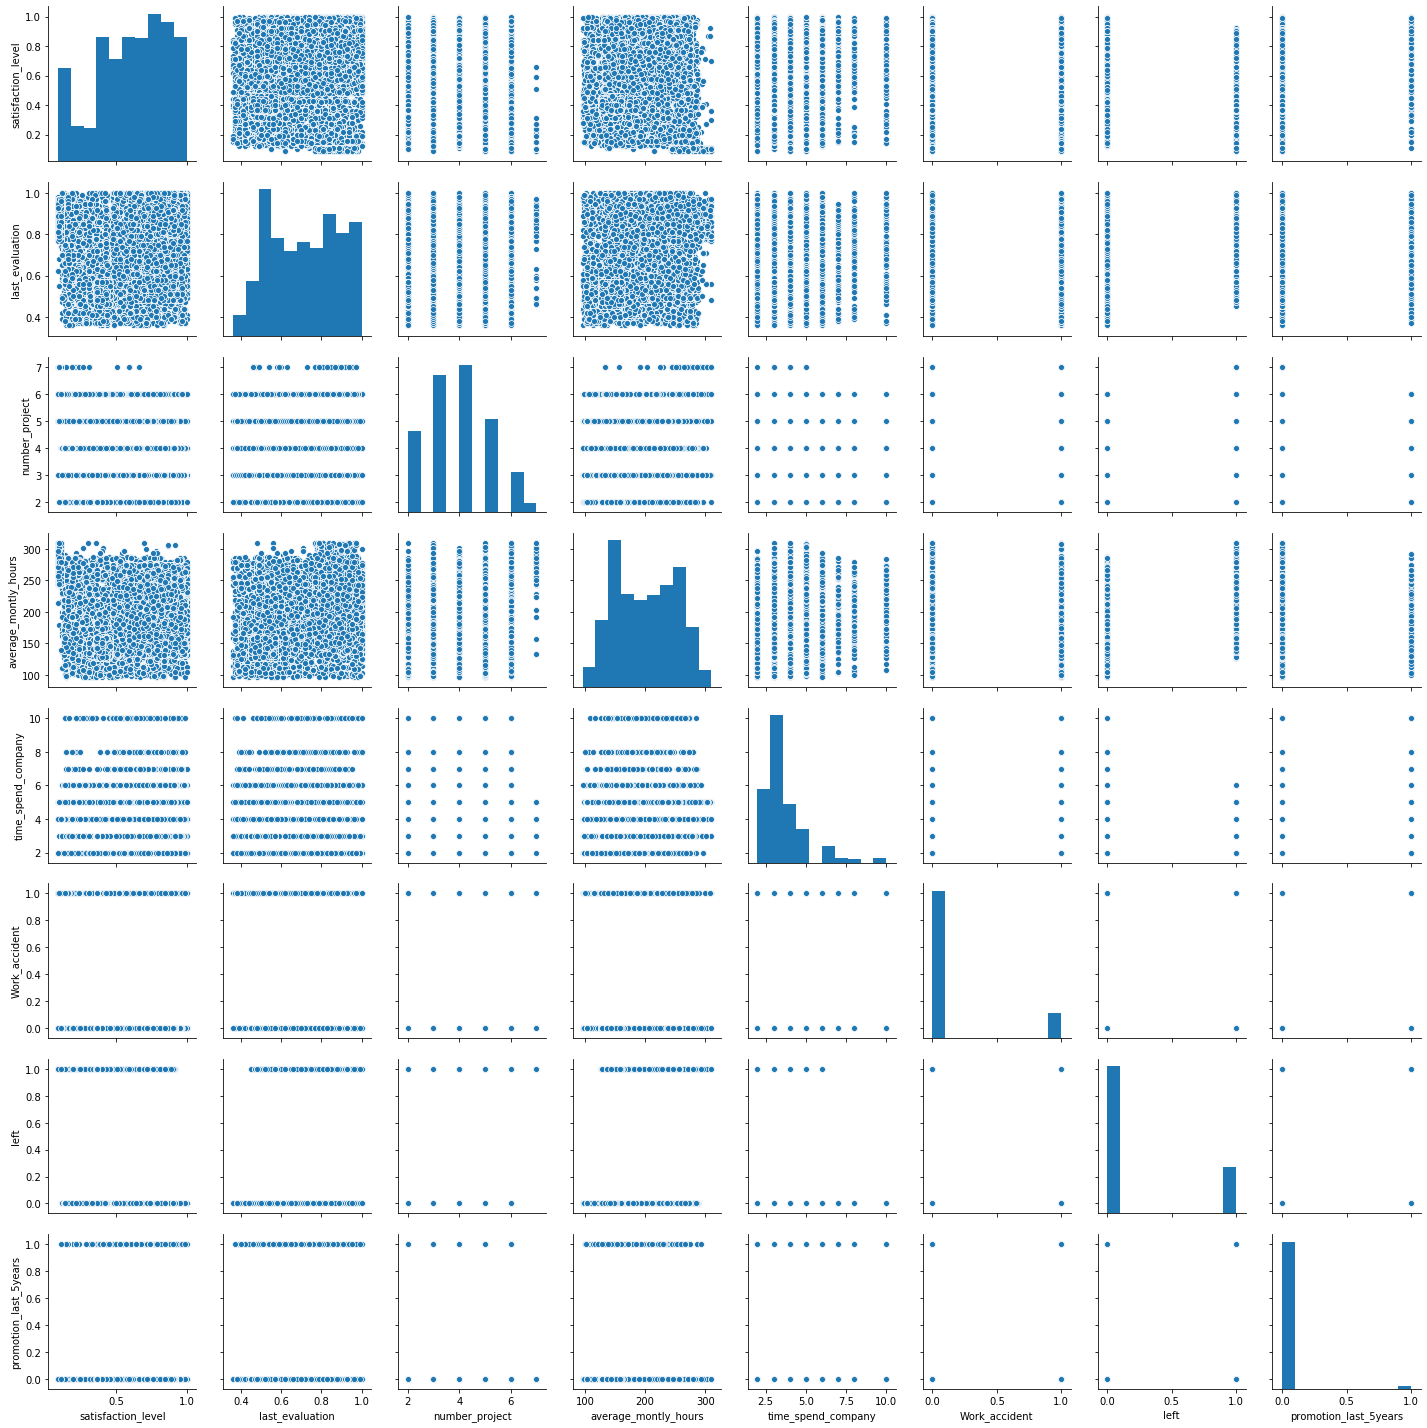

In [6]:
g = sns.pairplot(df)

In [ ]:
"""Данные свидетельствуют об отсутствии корреляционной зависимости между
переменными"""

In [ ]:
4.Визуализировать несколько взаимосвязей между переменными.

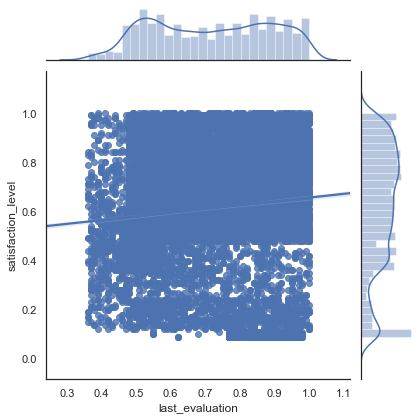

In [7]:
last_evaluation = df['last_evaluation']
satisfaction_level = df['satisfaction_level']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=last_evaluation, y=satisfaction_level, data=df, kind='reg')
plt.show()

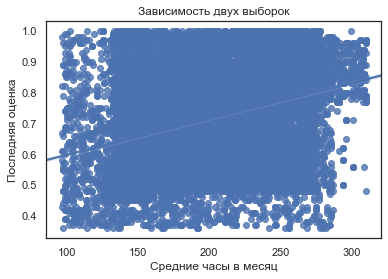

In [8]:
average_montly_hours = df['average_montly_hours']
last_evaluation = df['last_evaluation']
sns.regplot(x= average_montly_hours, y=last_evaluation, data=df, fit_reg=True)
plt.xlabel('Средние часы в месяц')
plt.ylabel('Последняя оценка')
plt.title('Зависимость двух выборок')
plt.grid(False)
plt.show()

Text(0, 0.5, 'средние часы в месяц')

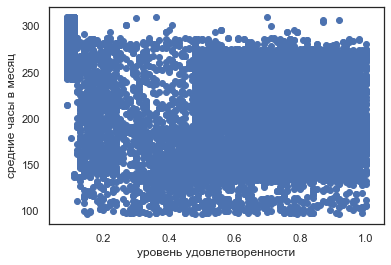

In [9]:
satisfaction_level = df['satisfaction_level']
average_montly_hours = df['average_montly_hours'] 
plt.scatter(satisfaction_level, average_montly_hours)
plt.xlabel('уровень удовлетворенности')
plt.ylabel('средние часы в месяц')

In [ ]:
5.С использованием t-test статистики проверить взаимосвязи между несколькими
переменными.

In [11]:
"""берем сотрудников с высокой зарплатой как выборочную совокупность,
оцениваем satisfaction_level, определяем насколько данная выборка 
соответсвует генеральной совокупности"""

employee_high_salary = df[df['salary']=='high']['satisfaction_level']
#len(employee_high_salary)
stats.ttest_1samp(employee_high_salary, df['satisfaction_level'].mean())
#employee_high_salary.mean()
#df['satisfaction_level'].mean()
"""t-критерий Стьюдента 3,82 превышает табличное значение 1,9799 (alpha = 0.05, 
N=1237), p-value равно 0.0001, что намного меньше стандартной альфа ошибки 0.05, 
поэтому мы отклоняем нулевую гипотезу и можем сказать, что имеется 
статистическое различие между сотрудниками с высокой зарплатой и генеральной 
совокупности в целом по оценке satisfaction_level"""


Ttest_1sampResult(statistic=3.82059975018617, pvalue=0.00013974368695866474)

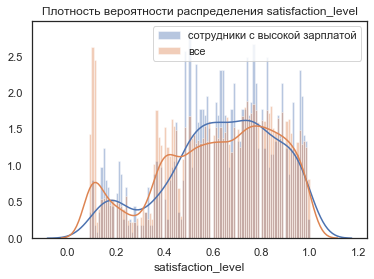

In [43]:
employee_high_salary = df[df['salary']=='high']['satisfaction_level']
employee_all = df['satisfaction_level']
sns.distplot(employee_high_salary, 100)
sns.distplot(employee_all, 100)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['сотрудники с высокой зарплатой', 'все'])
plt.show()

In [ ]:
"""график плотности вероятности выборки и генеральной совокупности показывает
статистическое различие"""

In [10]:
left = df[df['left']==1].satisfaction_level
stay = df[df['left']==0].satisfaction_level
print(stats.ttest_ind(left, stay))
#t-критерий Стьюдента (абсолютное значение) превышает табличное значение 1,9799
#(alpha = 0.05),p-value равно 0.0, поэтому мы отклоняем нулевую гипотезу и 
#можем сказать, что имеется статистическое различие между сотрудниками, которые
#уволились и остаются работать по оценке satisfaction_level.

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


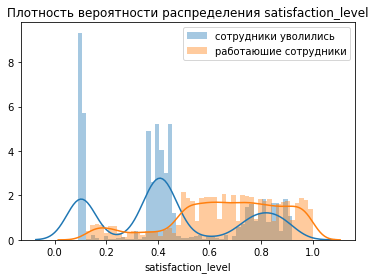

In [12]:
sns.distplot(left, 50)
sns.distplot(stay, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['сотрудники уволились', 'работаюшие сотрудники'])
plt.show()

In [ ]:
"""график подтверждает явное статистическое различие между сотрудниками, которые
уволились и остаются работать по оценке satisfaction_level"""

In [ ]:
6.Рассчитать сколько работников работает в каждом департаменте.

In [27]:
department = df['department'].value_counts()
print('Количество работников в каждом департаменте:')
department

Количество работников в каждом департаменте:


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
7.Показать распределение сотрудников по зарплатам.

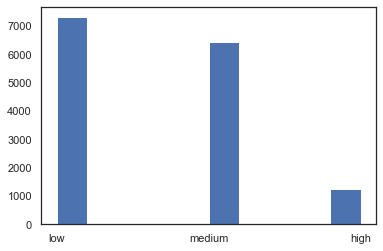

In [51]:
plt.hist(df['salary'])
plt.show()

In [ ]:
8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0, 0.5, 'Department')

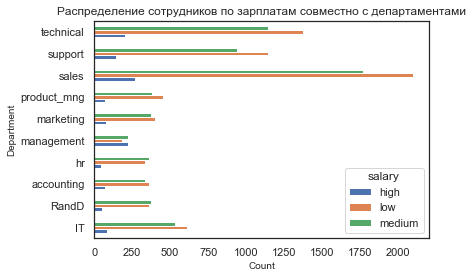

In [31]:
df = df.groupby(['department','salary'])['satisfaction_level'].count().unstack('salary')
df.plot(kind='barh')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами',fontsize=12)
plt.xlabel('Count',fontsize=10 )
plt.ylabel('Department', fontsize=10)

In [ ]:
9.Сколько сотрудников покинули компанию.

In [48]:
#df.info()
#df['left'].unique()
print('Количество сотрудников, покинувших компанию:', sum(df['left']))

Количество сотрудников, покинувших компанию: 3571


In [ ]:
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники
покидают компанию.

In [14]:
"""рассмотрим взаимосвязь увольнения сотрудников и уровня зарплаты"""
stat, p = spearmanr(df['left'], df['salary'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.024, p=0.004
Probably dependent


Text(0, 0.5, 'left')

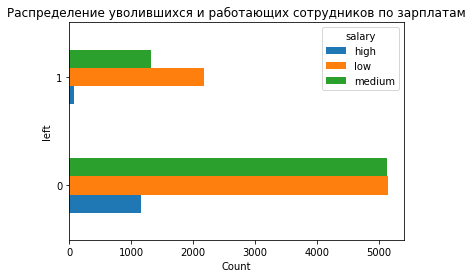

In [20]:
df = df.groupby(['left','salary'])['left'].count().unstack('salary')
df.plot(kind='barh')
plt.title('Распределение уволившихся и работающих сотрудников по зарплатам',fontsize=12)
plt.xlabel('Count',fontsize=10 )
plt.ylabel('left', fontsize=10)

In [ ]:
"""низкая статистическая значимость (p<0,05) в тесте и график показывают
зависимость увольнения сотрудников от уровня зарплаты"""

In [25]:
"""рассмотрим взаимосвязь увольнения сотрудников и average_montly_hours"""
stat, p = kendalltau(df['left'], df['average_montly_hours'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
"""низкая статистическая значимость (p=0.0) показывает зависимость увольнения
сотрудников от количества средних часов в месяц"""

stat=0.038, p=0.000
Probably dependent


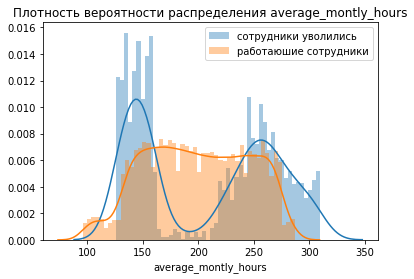

In [48]:
left = df[df['left']==1].average_montly_hours
stay = df[df['left']==0].average_montly_hours
sns.distplot(left, 50)
sns.distplot(stay, 50)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['сотрудники уволились', 'работаюшие сотрудники'])
plt.show()

In [ ]:
"""график подтверждает явное статистическое различие между 
сотрудниками, которые уволились и остаются работать в зависимости
от average_montly_hours"""

In [ ]:
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий.
Разместить ссылку на репозиторий в Личном кабинете.